# Tugaske5  : Centrality

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Baca file CSV
df = pd.read_csv("/content/drive/MyDrive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,Atlet Berkuda Medan Brandon Toa: Kecil-kecil C...,"Kamis, 10 Okt 2024 02:20 WIB",Jakarta - Atlet berkuda muda Brandon Toa terus...,Olahraga,Jakarta Atlet berkuda muda Brandon Toa terus ...,jakarta atlet berkuda muda brandon toa terus ...,"['jakarta', 'atlet', 'berkuda', 'muda', 'brand...",jakarta atlet berkuda muda brandon toa unjuk g...
1,Hasil Arctic Open 2024: Ahsan/Hendra Lolos,"Rabu, 09 Okt 2024 23:46 WIB",Jakarta - Ganda putra gaek Mohammad Ahsan/Hend...,Olahraga,Jakarta Ganda putra gaek Mohammad AhsanHendra...,jakarta ganda putra gaek mohammad ahsanhendra...,"['jakarta', 'ganda', 'putra', 'gaek', 'mohamma...",jakarta ganda putra gaek mohammad ahsanhendra ...
2,"Mutiara Terhenti, Gagal Wujudkan Mimpi di Keju...","Rabu, 09 Okt 2024 22:45 WIB",Jakarta - Impian Mutiara Ayu Puspitasari menda...,Olahraga,Jakarta Impian Mutiara Ayu Puspitasari mendap...,jakarta impian mutiara ayu puspitasari mendap...,"['jakarta', 'impian', 'mutiara', 'ayu', 'puspi...",jakarta impian mutiara ayu puspitasari medali ...
3,Sponsor Minta Gresini Pecat Pebalap Juara Moto...,"Rabu, 09 Okt 2024 22:15 WIB","Motegi - Manu Gonzalez , rider QJMotor Gresini...",Olahraga,Motegi Manu Gonzalez rider QJMotor Gresini M...,motegi manu gonzalez rider qjmotor gresini m...,"['motegi', 'manu', 'gonzalez', 'rider', 'qjmot...",motegi manu gonzalez rider qjmotor gresini mot...
4,"Leo/Bagas Tersingkir di Arctic Open, Langsung ...","Rabu, 09 Okt 2024 21:45 WIB",Vantaa - Leo Rolly Carnando/Bagas Maulana lang...,Olahraga,Vantaa Leo Rolly CarnandoBagas Maulana langsu...,vantaa leo rolly carnandobagas maulana langsu...,"['vantaa', 'leo', 'rolly', 'carnandobagas', 'm...",vantaa leo rolly carnandobagas maulana langsun...


In [ ]:
# mengambil satu sample berita
sample_berita = df['Filtering/stopword removal'].iloc[4]

sample_berita_list = [sample_berita]
print(sample_berita)

vantaa leo rolly carnandobagas maulana langsung evaluasi tersingkir arctic open alihkan fokus denmark bertanding babak rabu leobagas langsung bersua unggulan kedelapan man wei chongkai wun tee berjuang laga gim juara korea open kalah wakil malaysia skor leobagas berusaha maksimal kemenangan lawan bermain gim menentukan bermain sabar bermain maksimal bagas mengcover lapangan coba introspeksi masingmasing leo kutipan cepatnya pbsi bagas membenarkan pernyataan leo menyebut lawan bermain bagus kesulitan poin merubah strategi pola bermain leo bermain jalannya perjuangan arctic open terhenti bagas kalah leobagas berlarut kegagalan wajib bangkit turnamen denmark open pekan babak leobagas berjumpa duo grimley skotlandia christophermatthew evaluasi menghadapi pertandingan denmark perbaiki kekuatan fisik ketahanan lapangan semoga hasil depannya bagas mcybay


In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,alihkan,arctic,babak,bagas,bagus,bangkit,berjuang,berjumpa,berlarut,bermain,...,tee,terhenti,tersingkir,turnamen,unggulan,vantaa,wajib,wakil,wei,wun
0,0.068519,0.137038,0.137038,0.274075,0.068519,0.068519,0.068519,0.068519,0.068519,0.411113,...,0.068519,0.068519,0.068519,0.068519,0.068519,0.068519,0.068519,0.068519,0.068519,0.068519


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.03 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,alihkan,arctic,babak,bagas,bagus,bangkit,berjuang,berjumpa,berlarut,bermain,...,tee,terhenti,tersingkir,turnamen,unggulan,vantaa,wajib,wakil,wei,wun
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

          Node  Degree Centrality
0      alihkan                1.0
62  pernyataan                1.0
60    perbaiki                1.0
59       pekan                1.0
58        pbsi                1.0
..         ...                ...
26       hasil                1.0
25     grimley                1.0
24         gim                1.0
23       fokus                1.0
82         wun                1.0

[83 rows x 2 columns]


In [ ]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()  # Tetap menyimpan semua fitur

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)


Top 10 fitur berdasarkan degree centrality:
['alihkan', 'pernyataan', 'perbaiki', 'pekan', 'pbsi', 'open', 'merubah', 'menyebut', 'menghadapi', 'mengcover']

DataFrame asli dengan semua fitur (tanpa menghapus):
   alihkan  arctic  babak  bagas  bagus  bangkit  berjuang  berjumpa  \
0        1       1      1      1      1        1         1         1   

   berlarut  bermain  ...  tee  terhenti  tersingkir  turnamen  unggulan  \
0         1        1  ...    1         1           1         1         1   

   vantaa  wajib  wakil  wei  wun  
0       1      1      1    1    1  

[1 rows x 83 columns]


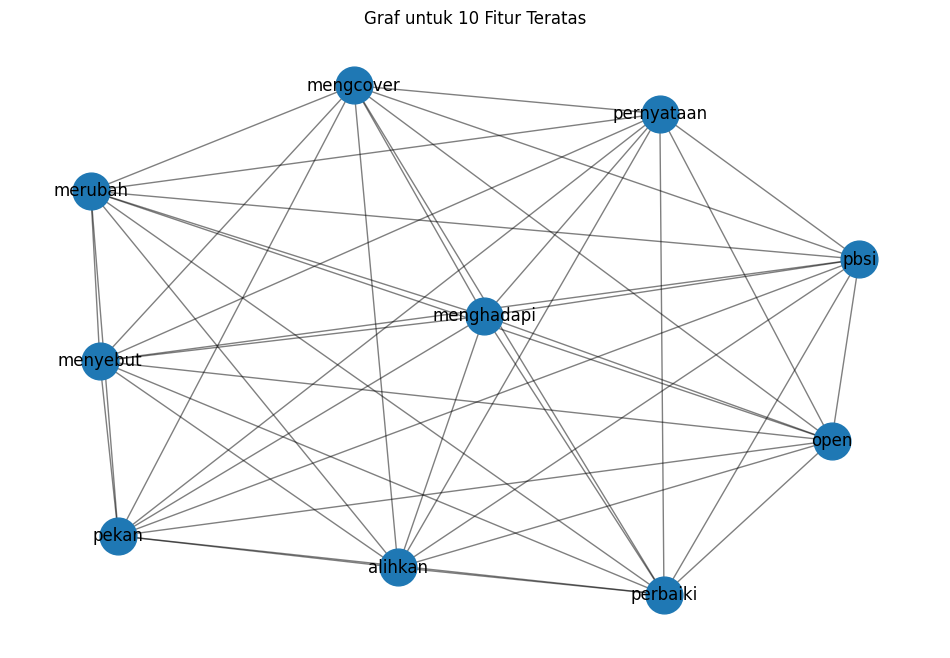

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():  # Memeriksa apakah dataframe df_tfidf_1berita sudah ada
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):  # Pastikan dataframe ini ada dan ukurannya benar
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

         Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0     alihkan                1.0                   1.0                     0.0
1  pernyataan                1.0                   1.0                     0.0
2    perbaiki                1.0                   1.0                     0.0
3       pekan                1.0                   1.0                     0.0
4        pbsi                1.0                   1.0                     0.0
5        open                1.0                   1.0                     0.0
6     merubah                1.0                   1.0                     0.0
7    menyebut                1.0                   1.0                     0.0
8  menghadapi                1.0                   1.0                     0.0
9   mengcover                1.0                   1.0                     0.0


In [ ]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: alihkan
